In [2]:
import csv

In [30]:
def get_loss(list):
    return [float(item.split()[1]) for item in list if item.startswith('Loss:')]

def get_time(list):
    return [float(item.split()[1]) for item in list if item.startswith('Time:')]

with open('losses.txt', 'r') as infile:
    reader = csv.reader(infile, delimiter='\t')
    reader = list(reader)
    losses = [get_loss(line) for line in reader if len(line) > 2]
    times  = [get_time(line) for line in reader if len(line) > 2]

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

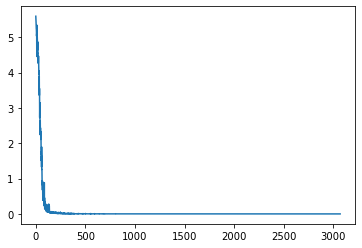

In [32]:
plt.plot(losses)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

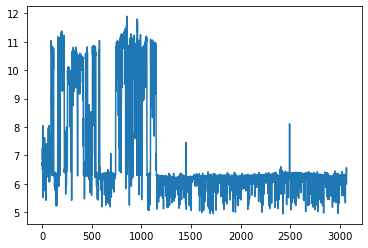

In [33]:
plt.plot(times)
plt.show

In [37]:
import librosa
import WaveNet.data as data

In [98]:
wavs = {}

for step in [2, 317]:
    wav = data.load('./generator_output/gen_{}.wav'.format(step), sample_rate=16000, trim=0)
    wav = wav.squeeze(1)
    wavs[step] = wav
    
wavs

{2: array([0.00390625, 0.00390625, 0.00390625, ..., 0.00390625, 0.00390625,
        0.00390625], dtype=float32),
 317: array([ 0.00390625,  0.00390625,  0.00390625, ...,  0.00390625,
        -0.01925659,  0.00390625], dtype=float32)}

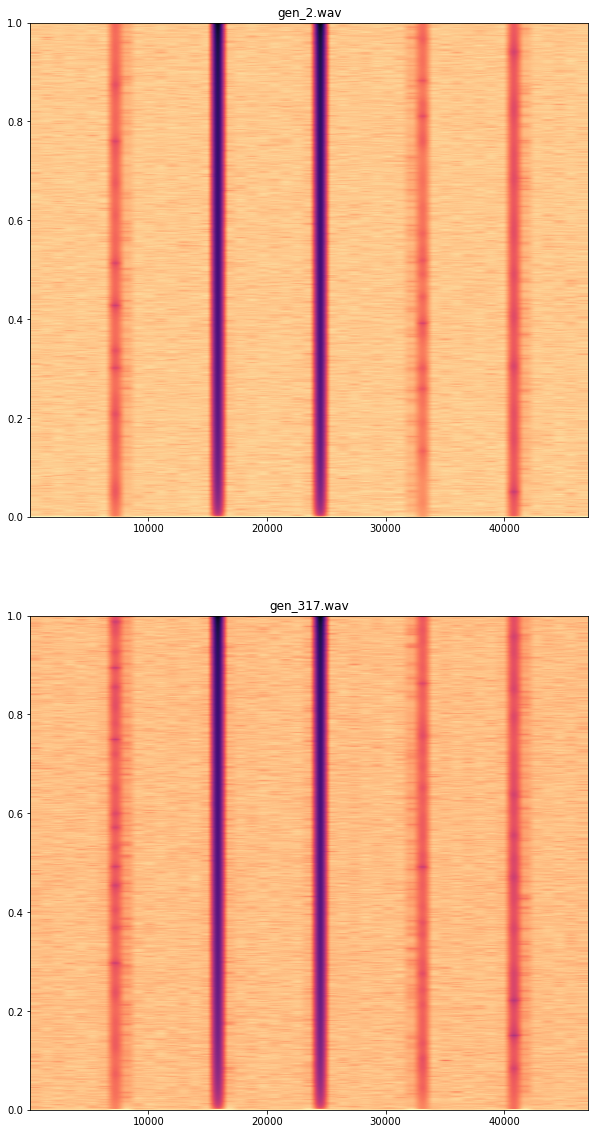

In [116]:
fig, axs = plt.subplots(nrows=len(wavs), figsize=(10, 20))

for axis, key in zip(axs, wavs):
    axis.specgram(wavs[key], NFFT=2048, cmap='magma')
    axis.set_title('gen_{}.wav'.format(key))

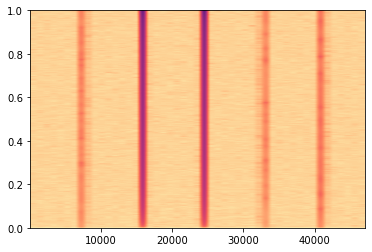

In [126]:
x1 = librosa.feature.melspectrogram(wavs[2])
x2 = librosa.feature.melspectrogram(wavs[317])
plt.specgram(wavs[2]- wavs[317], NFFT=2048, cmap='magma')
plt.show()